# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations

lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 578


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"
unit = 'metric'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    params = {
    'appid':weather_api_key,
    'q': city,
    'units':unit
    }
    # Create endpoint URL with each city
    #city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + unit
    response = requests.get(url, params=params).json()
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        #city_weather =

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response["coord"]["lat"]
        city_lng = response["coord"]["lon"]
        city_max_temp = response["main"]["temp_max"]
        city_humidity = response["main"]["humidity"]
        city_clouds = response["clouds"]["all"]
        city_wind = response["wind"]["speed"]
        city_country = response["sys"]["country"]
        city_date = response["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | touros
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | edinburgh of the seven seas
Processing Record 4 of Set 1 | badger
Processing Record 5 of Set 1 | longyearbyen
Processing Record 6 of Set 1 | waitangi
Processing Record 7 of Set 1 | new norfolk
Processing Record 8 of Set 1 | puerto natales
Processing Record 9 of Set 1 | west island
Processing Record 10 of Set 1 | hami
Processing Record 11 of Set 1 | uturoa
Processing Record 12 of Set 1 | ust-nera
Processing Record 13 of Set 1 | east london
Processing Record 14 of Set 1 | conception bay south
Processing Record 15 of Set 1 | grytviken
Processing Record 16 of Set 1 | bethel
Processing Record 17 of Set 1 | tazacorte
Processing Record 18 of Set 1 | kapa'a
Processing Record 19 of Set 1 | tutoia
Processing Record 20 of Set 1 | klyuchi
Processing Record 21 of Set 1 | thompson
Processing Record 22 of Set 1 | margaret river
Pr

In [5]:
#display the data
city_data

[{'City': 'touros',
  'Lat': -5.1989,
  'Lng': -35.4608,
  'Max Temp': 24.18,
  'Humidity': 81,
  'Cloudiness': 3,
  'Wind Speed': 4.01,
  'Country': 'BR',
  'Date': 1698285675},
 {'City': 'punta arenas',
  'Lat': -53.15,
  'Lng': -70.9167,
  'Max Temp': 3.06,
  'Humidity': 87,
  'Cloudiness': 75,
  'Wind Speed': 5.66,
  'Country': 'CL',
  'Date': 1698285584},
 {'City': 'edinburgh of the seven seas',
  'Lat': -37.0676,
  'Lng': -12.3116,
  'Max Temp': 11.31,
  'Humidity': 59,
  'Cloudiness': 52,
  'Wind Speed': 6.6,
  'Country': 'SH',
  'Date': 1698285675},
 {'City': 'badger',
  'Lat': 64.8,
  'Lng': -147.5333,
  'Max Temp': -2.02,
  'Humidity': 83,
  'Cloudiness': 40,
  'Wind Speed': 0,
  'Country': 'US',
  'Date': 1698285675},
 {'City': 'longyearbyen',
  'Lat': 78.2186,
  'Lng': 15.6401,
  'Max Temp': -5.09,
  'Humidity': 80,
  'Cloudiness': 0,
  'Wind Speed': 2.06,
  'Country': 'SJ',
  'Date': 1698285676},
 {'City': 'waitangi',
  'Lat': -43.9535,
  'Lng': -176.5597,
  'Max Temp': 12

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
print(city_data_df.count())
city_data_df

City          551
Lat           551
Lng           551
Max Temp      551
Humidity      551
Cloudiness    551
Wind Speed    551
Country       551
Date          551
dtype: int64


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,touros,-5.1989,-35.4608,24.18,81,3,4.01,BR,1698285675
1,punta arenas,-53.1500,-70.9167,3.06,87,75,5.66,CL,1698285584
2,edinburgh of the seven seas,-37.0676,-12.3116,11.31,59,52,6.60,SH,1698285675
3,badger,64.8000,-147.5333,-2.02,83,40,0.00,US,1698285675
4,longyearbyen,78.2186,15.6401,-5.09,80,0,2.06,SJ,1698285676
...,...,...,...,...,...,...,...,...,...
546,gazipasa,36.2694,32.3179,18.05,63,0,2.57,TR,1698285822
547,majene,-3.5403,118.9707,29.57,60,4,3.42,ID,1698285822
548,kirensk,57.7853,108.1119,-0.58,89,100,5.36,RU,1698285822
549,bloomsburg,41.0037,-76.4549,16.63,89,51,0.83,US,1698285822


In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,touros,-5.1989,-35.4608,24.18,81,3,4.01,BR,1698285675
1,punta arenas,-53.1500,-70.9167,3.06,87,75,5.66,CL,1698285584
2,edinburgh of the seven seas,-37.0676,-12.3116,11.31,59,52,6.60,SH,1698285675
3,badger,64.8000,-147.5333,-2.02,83,40,0.00,US,1698285675
4,longyearbyen,78.2186,15.6401,-5.09,80,0,2.06,SJ,1698285676


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,touros,-5.1989,-35.4608,24.18,81,3,4.01,BR,1698285675
1,punta arenas,-53.1500,-70.9167,3.06,87,75,5.66,CL,1698285584
2,edinburgh of the seven seas,-37.0676,-12.3116,11.31,59,52,6.60,SH,1698285675
3,badger,64.8000,-147.5333,-2.02,83,40,0.00,US,1698285675
4,longyearbyen,78.2186,15.6401,-5.09,80,0,2.06,SJ,1698285676


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

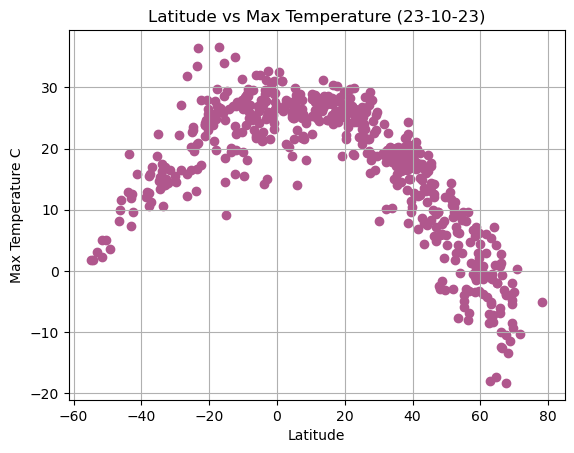

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'],color='#B0578D',)
# Incorporate the other graph properties
plt.title('Latitude vs Max Temperature (23-10-23)')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature C")
plt.grid(visible=True)
# Save the figure
plt.savefig("output_data/latvmaxtemp.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

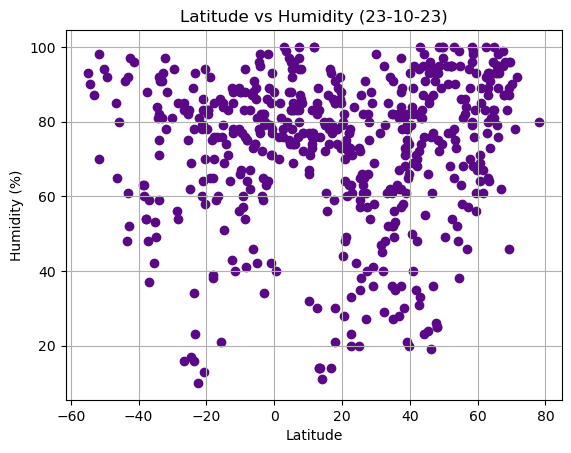

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'],color='#5B0888',)
# Incorporate the other graph properties
plt.title('Latitude vs Humidity (23-10-23)')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(visible=True)
# Save the figure
plt.savefig("output_data/latvhum.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

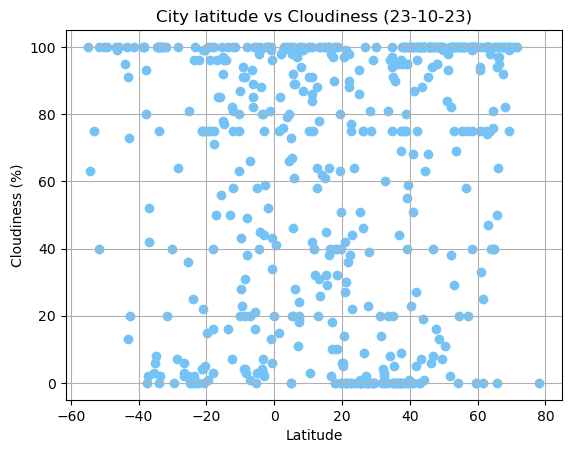

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'],color='#75C2F6',)
# Incorporate the other graph properties
plt.title('City latitude vs Cloudiness (23-10-23)')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(visible=True)
# Save the figure
plt.savefig("output_data/latvcloud.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

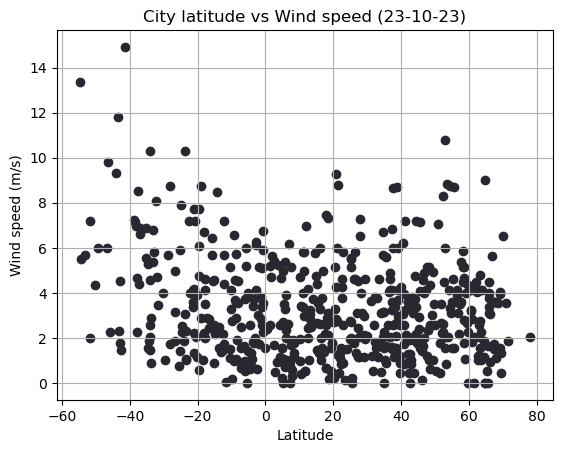

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'],color='#2B2730',)
# Incorporate the other graph properties
plt.title('City latitude vs Wind speed (23-10-23)')
plt.xlabel("Latitude")
plt.ylabel("Wind speed (m/s)")
plt.grid(visible=True)
# Save the figure
plt.savefig("output_data/latvwind.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df.Lat >= 0]


# Display sample data
northern_hemi_df.head()
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df.Lat < 0]


# Display sample data

southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,touros,-5.1989,-35.4608,24.18,81,3,4.01,BR,1698285675
1,punta arenas,-53.1500,-70.9167,3.06,87,75,5.66,CL,1698285584
2,edinburgh of the seven seas,-37.0676,-12.3116,11.31,59,52,6.60,SH,1698285675
5,waitangi,-43.9535,-176.5597,12.87,91,95,9.34,NZ,1698285676
6,new norfolk,-42.7826,147.0587,12.62,52,73,4.54,AU,1698285676


In [15]:
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,badger,64.8000,-147.5333,-2.02,83,40,0.00,US,1698285675
4,longyearbyen,78.2186,15.6401,-5.09,80,0,2.06,SJ,1698285676
9,hami,42.8000,93.4500,14.84,31,0,1.30,CN,1698285677
11,ust-nera,64.5667,143.2000,-17.28,96,76,1.16,RU,1698285678
13,conception bay south,47.4999,-52.9981,9.69,93,100,4.13,CA,1698285679


## Northern Hemisphere: Max Temperature vs Latitude (Linear Regression)

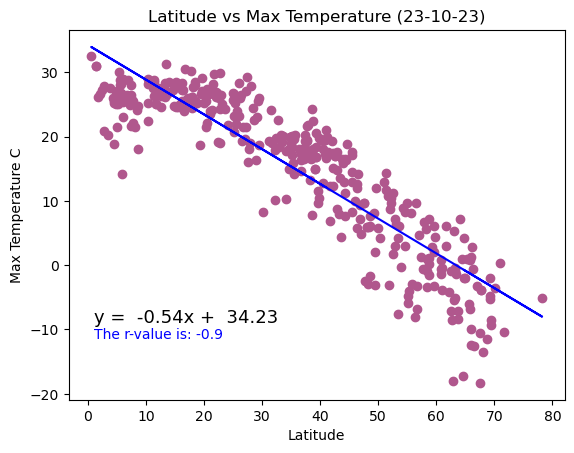

In [16]:
# Define a function to create Linear Regression plots
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(b1,b0,rvalue,pvalue,stderr) = linregress(x_values,y_values)
regress_values = b0 + b1*x_values
line_eq = "y =  " + str(round(b1,2)) + "x +  "  + str(round(b0, 2))
plt.scatter(x_values,y_values,color='#B0578D')
plt.plot(x_values,regress_values, color='b')
plt.annotate(line_eq,(1,-9), fontsize=13, color="black")
plt.text(1,-11.5,f'The r-value is: {round(rvalue,2)}',color= 'blue')
# Incorporate the other graph properties
plt.title('Latitude vs Max Temperature (23-10-23)')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature C")
plt.grid(visible=False)
# Save the figure
plt.savefig("output_data/latvmaxtemp2.png")

# Show plot
plt.show()

## Southern Hemisphere: Max Temperature vs Latitude (Linear Regression)

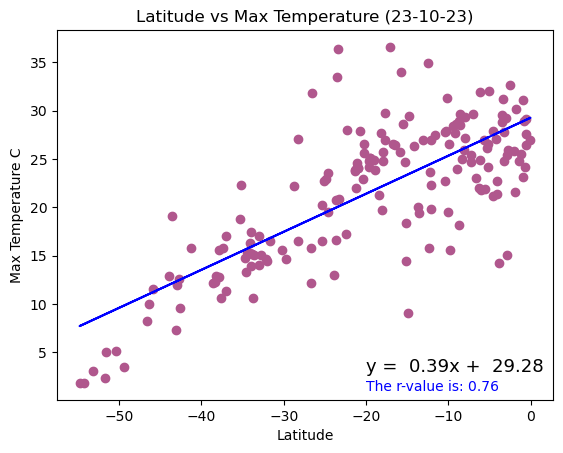

In [17]:
# Define a function to create Linear Regression plots
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(b1,b0,rvalue,pvalue,stderr) = linregress(x_values,y_values)
regress_values = b0 + b1*x_values
line_eq = "y =  " + str(round(b1,2)) + "x +  "  + str(round(b0, 2))
plt.scatter(x_values,y_values,color='#B0578D')
plt.plot(x_values,regress_values, color='b')
plt.annotate(line_eq,(-20,3), fontsize=13, color="black")
plt.text(-20,1,f'The r-value is: {round(rvalue,2)}',color= 'blue')
# Incorporate the other graph properties
plt.title('Latitude vs Max Temperature (23-10-23)')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature C")
plt.grid(visible=False)
# Save the figure
plt.savefig("output_data/latvmaxtemp3.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** Both northen hemisphere data and southern hemisphere data have a direct relation between latitude and temperature, when the closer tot zero (ecuador) the higher the temperature is, the further from zero, the lowet it gets. Hence the strong correlation.

### Humidity vs. Latitude Linear Regression Plot

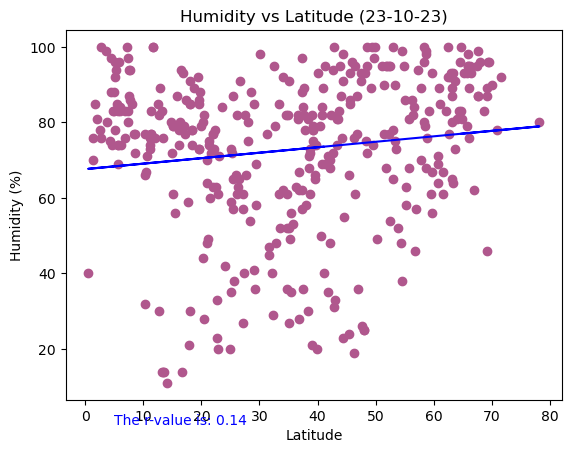

In [18]:
# Define a function to create Linear Regression plots
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(b1,b0,rvalue,pvalue,stderr) = linregress(x_values,y_values)
regress_values = b0 + b1*x_values
line_eq = "y =  " + str(round(b1,2)) + "x +  "  + str(round(b0, 2))
plt.scatter(x_values,y_values,color='#B0578D')
plt.plot(x_values,regress_values, color='b')
plt.annotate(line_eq,(5,5), fontsize=13, color="black")
plt.text(5,0,f'The r-value is: {round(rvalue,2)}',color= 'blue')
# Incorporate the other graph properties
plt.title('Humidity vs Latitude (23-10-23)')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(visible=False)
# Save the figure
plt.savefig("output_data/latvhum2.png")

# Show plot
plt.show()

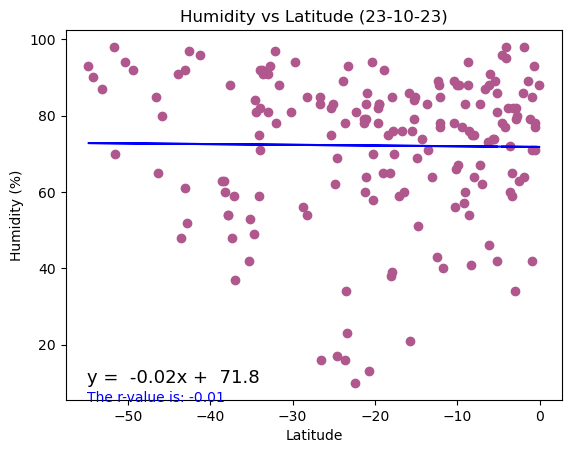

In [19]:
# Define a function to create Linear Regression plots
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(b1,b0,rvalue,pvalue,stderr) = linregress(x_values,y_values)
regress_values = b0 + b1*x_values
line_eq = "y =  " + str(round(b1,2)) + "x +  "  + str(round(b0, 2))
plt.scatter(x_values,y_values,color='#B0578D')
plt.plot(x_values,regress_values, color='b')
plt.annotate(line_eq,(-55,10), fontsize=13, color="black")
plt.text(-55,5,f'The r-value is: {round(rvalue,2)}',color= 'blue')
# Incorporate the other graph properties
plt.title('Humidity vs Latitude (23-10-23)')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(visible=False)
# Save the figure
plt.savefig("output_data/latvhum3.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** Both types of data show a very weak linear correlation, meaning the variables have not a linear impact on each other, if they have any relation at all. Practically, it means humidity does not depend on the latitude.

### Cloudiness vs. Latitude Linear Regression Plot

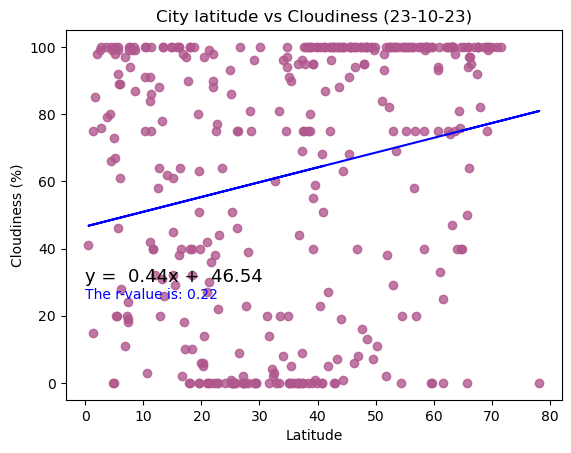

In [20]:
# Define a function to create Linear Regression plots
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(b1,b0,rvalue,pvalue,stderr) = linregress(x_values,y_values)
regress_values = b0 + b1*x_values
line_eq = "y =  " + str(round(b1,2)) + "x +  "  + str(round(b0, 2))
plt.scatter(x_values,y_values,color='#B0578D',alpha=0.8)
plt.plot(x_values,regress_values, color='b')
plt.annotate(line_eq,(0,30), fontsize=13, color="black")
plt.text(0,25,f'The r-value is: {round(rvalue,2)}',color= 'blue')
# Incorporate the other graph properties
plt.title('City latitude vs Cloudiness (23-10-23)')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(visible=False)
# Save the figure
plt.savefig("output_data/latvcloud2.png")

# Show plot
plt.show()

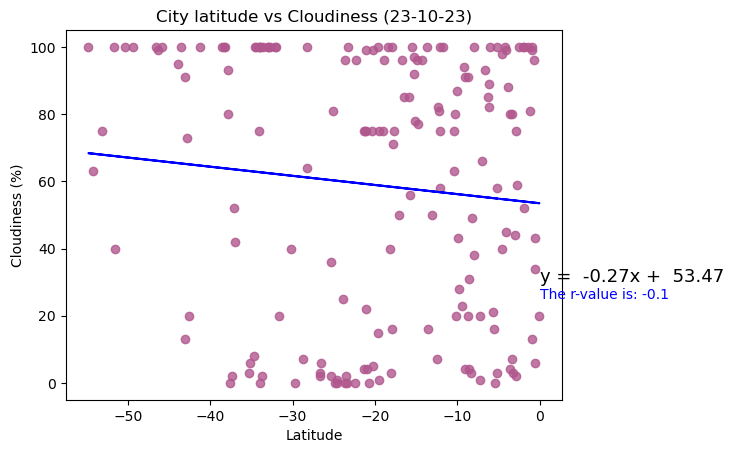

In [21]:
# Define a function to create Linear Regression plots
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(b1,b0,rvalue,pvalue,stderr) = linregress(x_values,y_values)
regress_values = b0 + b1*x_values
line_eq = "y =  " + str(round(b1,2)) + "x +  "  + str(round(b0, 2))
plt.scatter(x_values,y_values,color='#B0578D',alpha=0.8)
plt.plot(x_values,regress_values, color='b')
plt.annotate(line_eq,(0,30), fontsize=13, color="black")
plt.text(0,25,f'The r-value is: {round(rvalue,2)}',color= 'blue')
# Incorporate the other graph properties
plt.title('City latitude vs Cloudiness (23-10-23)')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(visible=False)
# Save the figure
plt.savefig("output_data/latvcloud3.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** Both types of data show a very weak linear correlation, even the data distribution suggest that no relation between the variables exists. Meaning latitude is not a good predictor for cloudiness

### Wind Speed vs. Latitude Linear Regression Plot

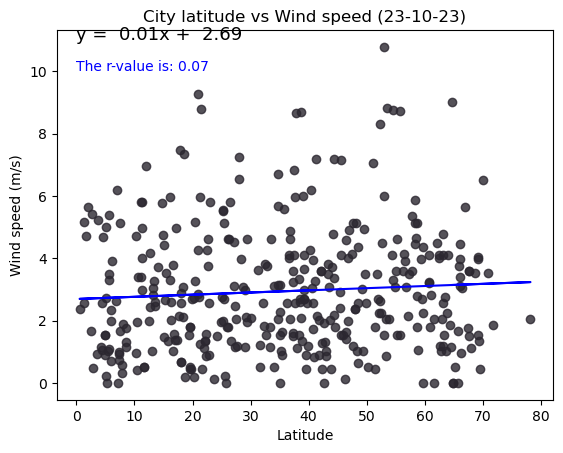

In [22]:
# Define a function to create Linear Regression plots
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(b1,b0,rvalue,pvalue,stderr) = linregress(x_values,y_values)
regress_values = b0 + b1*x_values
line_eq = "y =  " + str(round(b1,2)) + "x +  "  + str(round(b0, 2))
plt.scatter(x_values,y_values,color='#2B2730',alpha=0.8)
plt.plot(x_values,regress_values, color='b')
plt.annotate(line_eq,(0,11), fontsize=13, color="black")
plt.text(0,10,f'The r-value is: {round(rvalue,2)}',color= 'blue')
# Incorporate the other graph properties
plt.title('City latitude vs Wind speed (23-10-23)')
plt.xlabel("Latitude")
plt.ylabel("Wind speed (m/s)")
plt.grid(visible=False)
# Save the figure
plt.savefig("output_data/latvwind2.png")

# Show plot
plt.show()

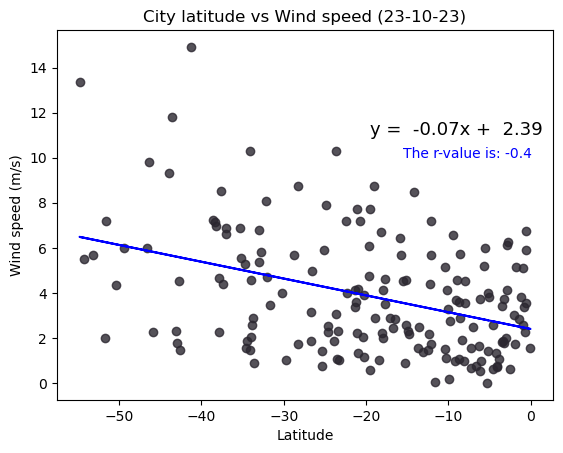

In [23]:
# Define a function to create Linear Regression plots
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(b1,b0,rvalue,pvalue,stderr) = linregress(x_values,y_values)
regress_values = b0 + b1*x_values
line_eq = "y =  " + str(round(b1,2)) + "x +  "  + str(round(b0, 2))
plt.scatter(x_values,y_values,color='#2B2730',alpha=0.8)
plt.plot(x_values,regress_values, color='b')
plt.annotate(line_eq,(-19.5,11), fontsize=13, color="black")
plt.text(-15.5,10,f'The r-value is: {round(rvalue,2)}',color= 'blue')
# Incorporate the other graph properties
plt.title('City latitude vs Wind speed (23-10-23)')
plt.xlabel("Latitude")
plt.ylabel("Wind speed (m/s)")
plt.grid(visible=False)
# Save the figure
plt.savefig("output_data/latvwind2.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** Both types of data show a very weak linear correlation, as before the data distribution suggest that no relation between the variables exists. In this case the data presents a different pattern, but no explanation can be given by analysing these two variables.